# Callback 함수

- #### 콜백 함수라는 것은, 특정상황에서 실행될 함수를 시스템에 등록해두면, 상황 발생 시 시스템이 자동으올 실해해주는 함수.
- Tensorflow 콜백 함수는 <b>모델의 학습방향, 저장 시점, 그리고 학습 정지 시점</b>드에 관한 상황을 모니터링하는데 사용됨.

- 일정시간이 지나도 검증데이터(validation data) 손실값(loss_val)이 개선되지 않으면,   
  학습 도중에 학습율(learning_rate)를 변화 시키거나 학습을 멈추게 하는등의 작업을 할 수 있음.
> - <b>MoelCheckpoint</b> : 학중 도중 가중치(weight) 저장 
> - <b>ReduceLROnPlateau</b> : 학습 도중에 학습율을 변화
> - <b>EarlyStopping</b> : loss_val 개성되지 않을 시 조기 종료

In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

In [3]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)


x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [4]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

In [43]:
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)
print(x_train.shape)

(60000, 28, 28)


In [6]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28)))  

model.add(Dense(100, activation='relu'))     

model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# ModelCheckpoint(), EarlyStopping()
 - val_loss 기준으로 callback 호출
 - epoch 3번 동안 val_loss 개선되지 않으면 callback 호출 => 조기 종료
 - val_loss 개선된 경우 callback 호출 =>  가중치 best값만 지정 위치에 저장 

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = './modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', 
                             save_best_only=True, mode='auto', verbose=1)

stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, 
                 callbacks=[checkpoint, stopping])

Epoch 1/30
1463/1500 [============================>.] - ETA: 0s - loss: 0.2997 - accuracy: 0.9144
Epoch 1: val_loss improved from inf to 0.16296, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 2s 865us/step - loss: 0.2962 - accuracy: 0.9154 - val_loss: 0.1630 - val_accuracy: 0.9529
Epoch 2/30
1437/1500 [===========================>..] - ETA: 0s - loss: 0.1383 - accuracy: 0.9601
Epoch 2: val_loss improved from 0.16296 to 0.11898, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 1s 778us/step - loss: 0.1364 - accuracy: 0.9605 - val_loss: 0.1190 - val_accuracy: 0.9643
Epoch 3/30
1467/1500 [============================>.] - ETA: 0s - loss: 0.0957 - accuracy: 0.9716
Epoch 3: val_loss improved from 0.11898 to 0.10515, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 1s 799us/step - loss: 0.0959 - accuracy: 0.9717 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 4/30
1465/1500 [==========

In [9]:
model.evaluate(x_test, t_test)


313/313 [==============================] - 0s 451us/step - loss: 0.0812 - accuracy: 0.9772


[0.08122965693473816, 0.9771999716758728]

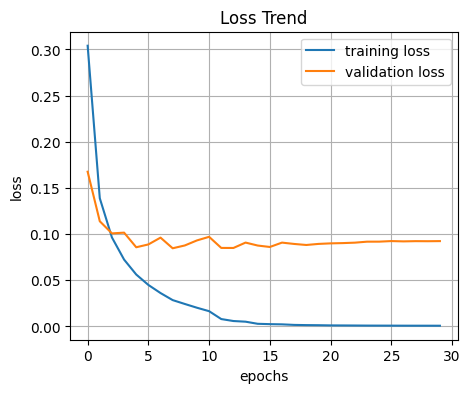

In [37]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

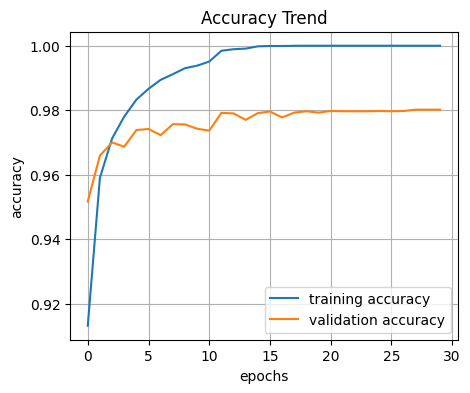

In [36]:
# 정확도 함수 그래프

plt.figure(figsize=(5,4))

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

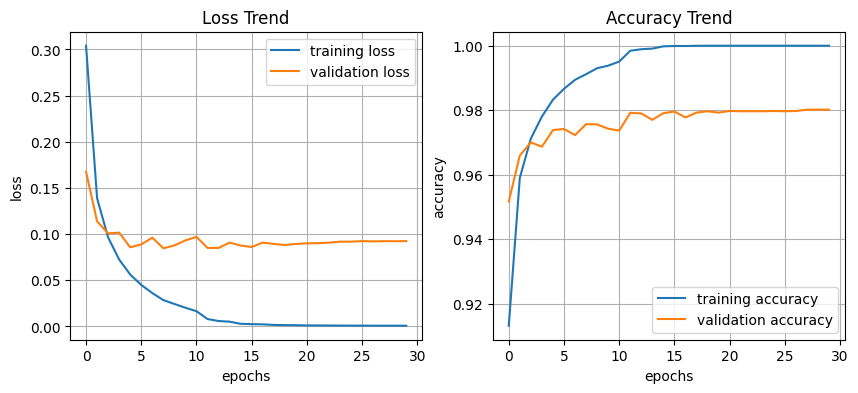

In [35]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

# ReduceLROnPlateau

In [15]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28)))  

model.add(Dense(100, activation='relu'))     

model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### ReduceLROnPlateau
 - val_loss 기준으로 callback 호출
 - epoch 3번 동안 val_loss 개선되지 않으면 callback 호출 
 - callback 호출시 학습율을 1/2로 줄임 

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor='val_loss', 
                             factor=0.5, patience=3, verbose=1)

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, 
                 callbacks=[reduceLR])

Epoch 1/30
1500/1500 [==============================] - 1s 802us/step - loss: 0.3041 - accuracy: 0.9131 - val_loss: 0.1676 - val_accuracy: 0.9517 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - 1s 761us/step - loss: 0.1389 - accuracy: 0.9590 - val_loss: 0.1139 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 3/30
1500/1500 [==============================] - 1s 781us/step - loss: 0.0964 - accuracy: 0.9712 - val_loss: 0.1008 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - 1s 761us/step - loss: 0.0724 - accuracy: 0.9780 - val_loss: 0.1016 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 5/30
1500/1500 [==============================] - 1s 762us/step - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0857 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 6/30
1500/1500 [==============================] - 1s 755us/step - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.0888 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 7/30
1500/1500 [========================

In [18]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 428us/step - loss: 0.0859 - accuracy: 0.9801


[0.0858747586607933, 0.9800999760627747]

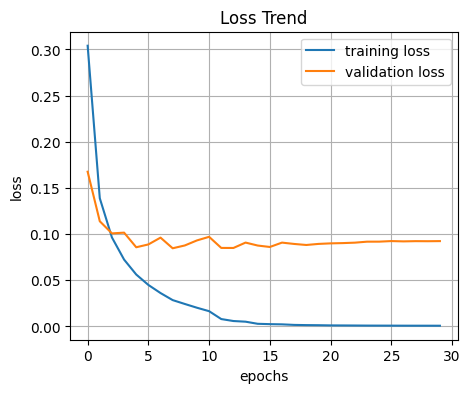

In [38]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

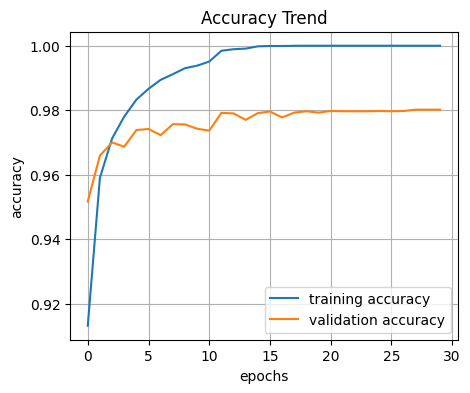

In [39]:
# 정확도 함수 그래프

plt.figure(figsize=(5, 4))

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

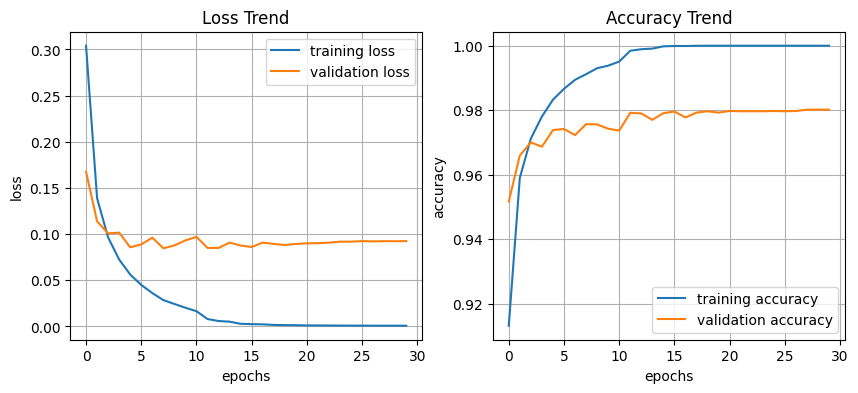

In [40]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()